In [53]:
from scipy.stats import uniform, norm, expon, beta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(color_codes=True)

### Uniform Distribution

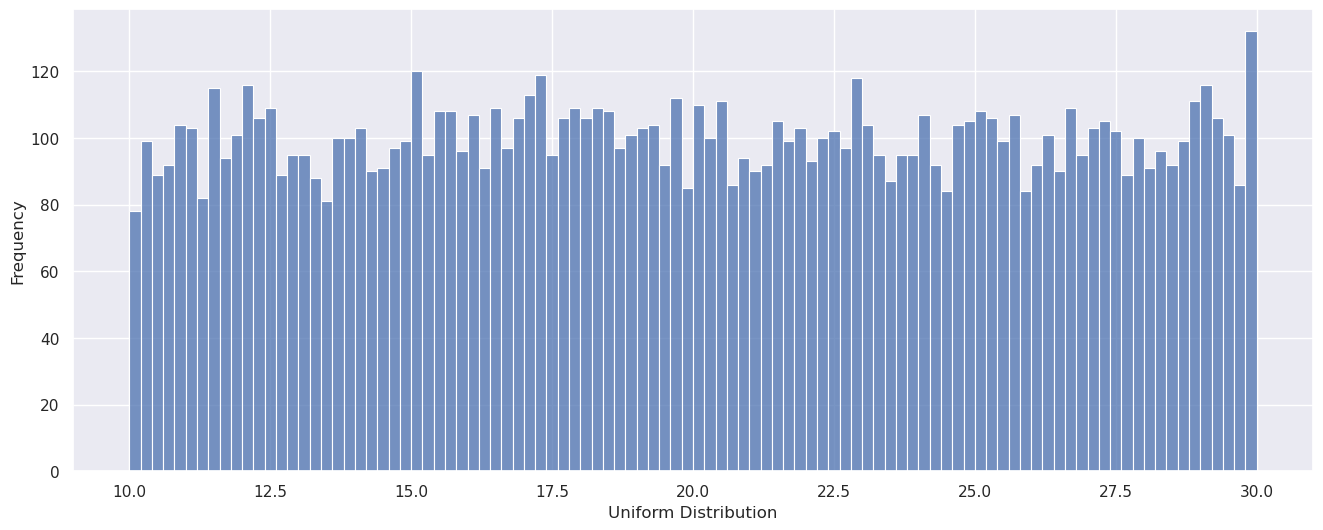

In [54]:
n = 10000

start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc=start, scale=width)

ax = sns.histplot(data_uniform, bins=100, kde=False)

ax.set(xlabel="Uniform Distribution", ylabel="Frequency")

plt.show()

### Normal Distribution

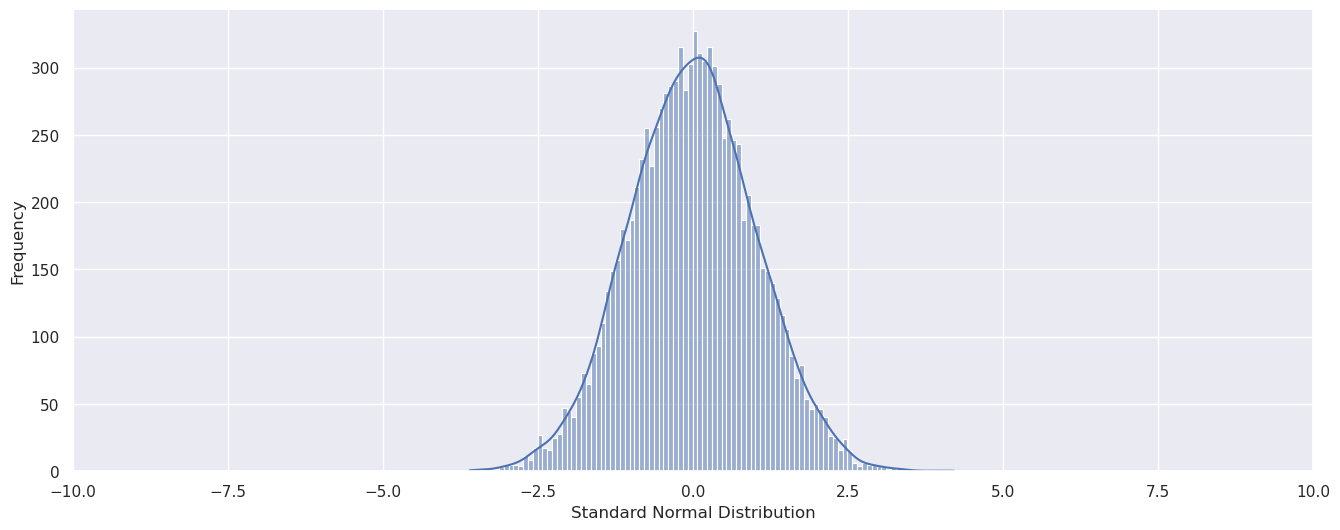

In [55]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

ax = sns.histplot(data_normal, bins=100, kde=True)

ax.set(xlabel="Standard Normal Distribution", ylabel="Frequency")

plt.xlim(-10, 10)
plt.show()

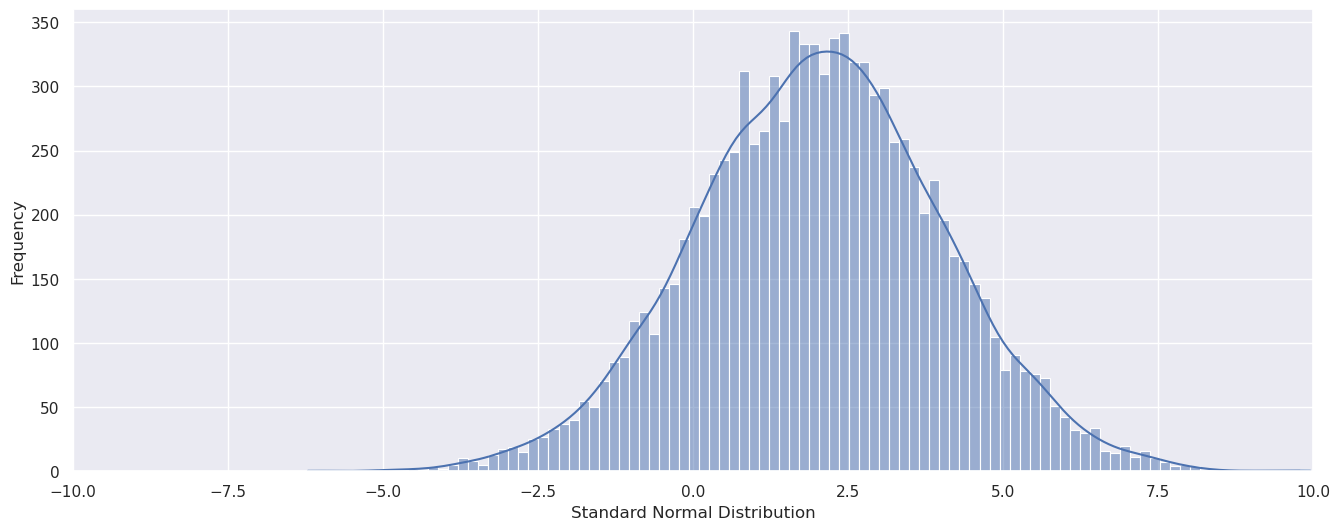

In [56]:
data_normal = norm.rvs(size=10000, loc=2, scale=2)

ax = sns.histplot(data_normal, bins=100, kde=True)

ax.set(xlabel="Standard Normal Distribution", ylabel="Frequency")

plt.xlim(-10, 10)
plt.show()

### Exponential Distribution

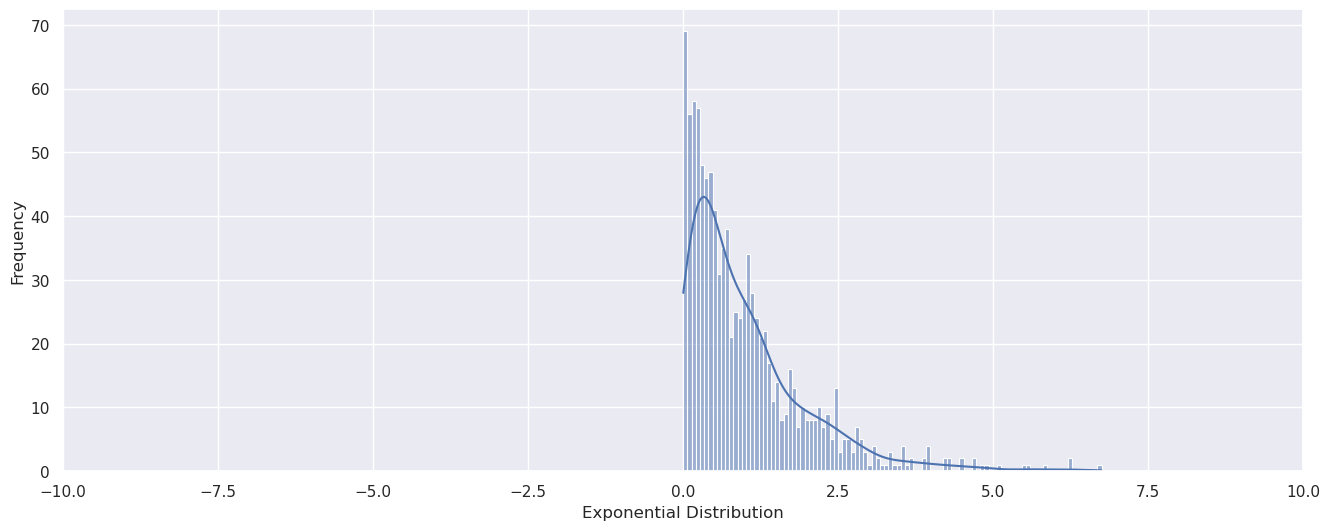

In [57]:
data_expon = expon.rvs(size=1000, loc=0, scale=1)

ax = sns.histplot(data_expon, bins=100, kde=True)
ax.set(xlabel="Exponential Distribution", ylabel="Frequency")

plt.xlim(-10, 10)
plt.show()

### Beta Distribution

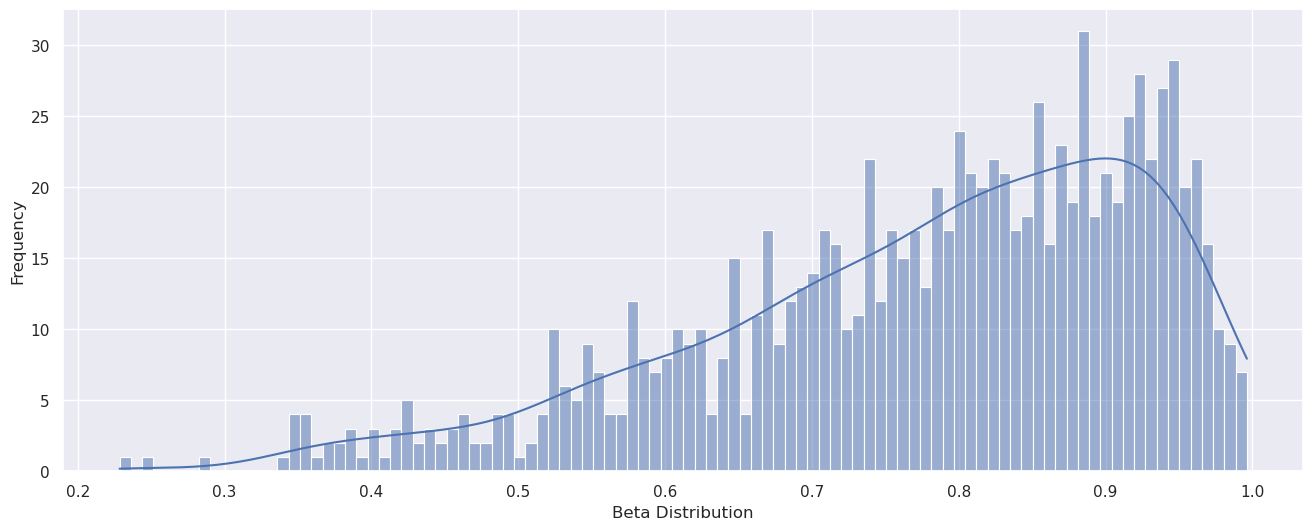

In [58]:
data_beta = beta.rvs(size=1000, a=5.7, b=1.627)

ax = sns.histplot(data_beta, bins=100, kde=True)
ax.set(xlabel="Beta Distribution", ylabel="Frequency")

plt.show()

### Bayesian Inference and Continuous Distributions

In [59]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
figsize(16, 6)

#### Sleep Data Analysis

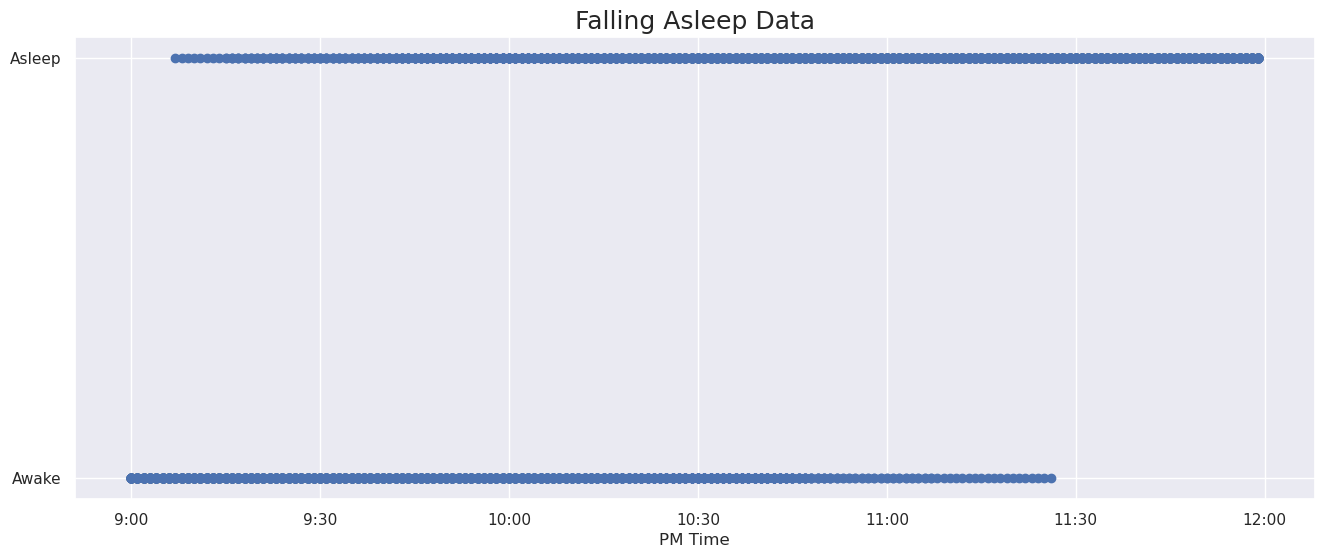

In [60]:
sleep_data = pd.read_csv('data/sleep_data.csv')

# labels for plotting
sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']

# sleep data
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'])

plt.yticks([0, 1], ["Awake", "Asleep"])
plt.xlabel("PM Time")
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels)
plt.title("Falling Asleep Data", size=18)
plt.show()

In [61]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
1,2017-12-01 21:01:00,0,-59
2,2017-12-01 21:02:00,0,-58
3,2017-12-01 21:03:00,0,-57
4,2017-12-01 21:04:00,0,-56


In [62]:
sleep_data.sort_values('time_offset', inplace=True)

# Time is the time offset
time = np.array(sleep_data.loc[:, 'time_offset'])
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

print (time)
print (sleep_obs)

[-60 -60 -60 ... 119 119 119]
[0 0 0 ... 1 1 1]


In [63]:
sleep_data.loc[sleep_data['time_offset'] == 0] # where time_offset is zero means exactly at 10:00 PM

,Unnamed: 0,indicator,time_offset
6900,2018-01-08 22:00:00,0,0
1680,2017-12-10 22:00:00,0,0
4740,2017-12-27 22:00:00,1,0
3300,2017-12-19 22:00:00,1,0
2940,2017-12-17 22:00:00,0,0
...,...,...,...
11040,2018-01-31 22:00:00,0,0
780,2017-12-05 22:00:00,1,0
1320,2017-12-08 22:00:00,1,0
9960,2018-01-25 22:00:00,1,0


#### Calculating Probability at a Particular Time

In [64]:
time_offset = 14 # at 10:14

In [65]:
awake_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) & (sleep_data['indicator'] == 0)] # time is at 14, and banda is awake (0)

In [66]:
sleep_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) & (sleep_data['indicator'] == 1)] # time is at 14, and banda is sleep (1)

In [67]:
print(len(sleep_vals), len(awake_vals))

29 34


In [68]:
p_sleep_at_offset = len(sleep_vals) / (len(sleep_vals) + len(awake_vals))

print("P(Sleep at Offset) =", p_sleep_at_offset)

P(Sleep at Offset) = 0.4603174603174603


#### Calculating the Prior

In [69]:
alpha = 0.977400
beta = -0.067270

def calculate_prior(time, alpha, beta): 
  p = 1.0 / (1.0 + np.exp(np.dot(beta, time) + alpha))
  return p

time_est = np.linspace(time.min() - 5, time.max() + 5, 1000)[:, None]

sleep_est = calculate_prior(time_est, alpha, beta)

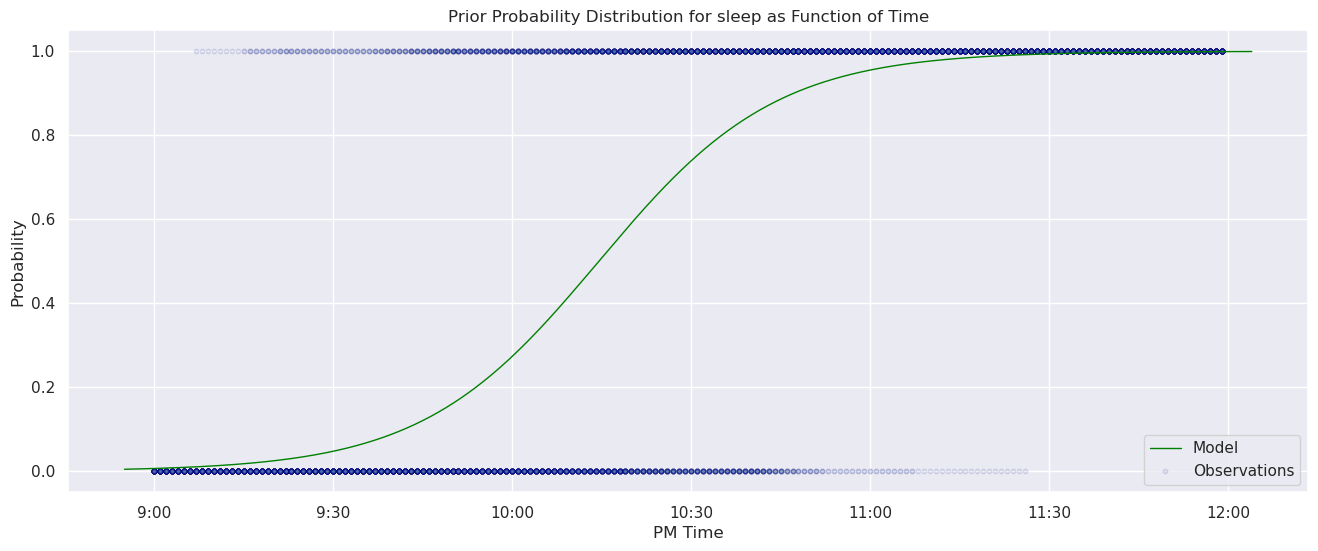

In [70]:
plt.plot(time_est, sleep_est, color="green", lw=1, label="Model")
plt.scatter(time, sleep_obs, edgecolor = "navy", s=10, alpha=0.1, label="Observations")

plt.title("Prior Probability Distribution for sleep as Function of Time")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("PM Time")
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels)

plt.show()

In [71]:
print('The probability of sleep increases to above 50% at 10:{} PM.\n'.format(
          int(time_est[np.where(sleep_est > 0.5)[0][0]][0])
        )
     )

print('9:30  PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(-30, alpha, beta)))
print('10:00 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(0, alpha, beta)))
print('10:30 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(15, alpha, beta)))

The probability of sleep increases to above 50% at 10:14 PM.

9:30  PM probability of being asleep: 4.76%.
10:00 PM probability of being asleep: 27.34%.
10:30 PM probability of being asleep: 50.79%.


#### Bayes Update on Distributions

In [72]:
# likelihoods

# P(light | sleep)
light_sleep = 0.01

# P(-light | sleep)
nolight_sleep = 0.99

# P(light | -sleep)
light_nosleep = 0.8

# P(-light | -sleep)
nolight_nosleep = 0.2

In [73]:
def update_probability(time_offset, light):
    # Calculate the prior for the time
    prior_probability = calculate_prior(time_offset, alpha, beta)
    
    # Account for evidence
    if light == 0:
        likelihood = nolight_sleep
        non_likelihood = nolight_nosleep
    elif light == 1:
        likelihood = light_sleep
        non_likelihood = light_nosleep
        
    # rewrite in terms of Bayes rule
    numerator = likelihood * prior_probability
    denominator = (likelihood * prior_probability) + (non_likelihood * (1 - prior_probability))
    
    conditional_probability = numerator / denominator
    
    
    if type(time_offset) == int:
        time = datetime.datetime(2017, 1, 1, 10, 0, 0)
        new_time = str((time + datetime. timedelta(minutes = time_offset)).time())
                       
        print('Time: {} PM \nLight is {}.'.format(new_time, "ON" if light == 1 else "OFF"))
    
        print('The prior probability of sleep:    {:.2f}%'.format(100 * prior_probability))
        print('The updated probability of sleep:  {:.2f}%'.format(100 * conditional_probability))
    
    return conditional_probability

In [74]:
result = update_probability(time_offset = 30, light = 1)

Time: 10:30:00 PM 
Light is ON.
The prior probability of sleep:    73.90%
The updated probability of sleep:  3.42%


In [75]:
result = update_probability(time_offset = 30, light = 0)

Time: 10:30:00 PM 
Light is OFF.
The prior probability of sleep:    73.90%
The updated probability of sleep:  93.34%


In [76]:
result = update_probability(time_offset = -30, light = 0)

Time: 09:30:00 PM 
Light is OFF.
The prior probability of sleep:    4.76%
The updated probability of sleep:  19.84%


#### Updating All Priors Independently

In [77]:
light_on_prob = update_probability(time_est, light = 1)
light_off_prob = update_probability(time_est, light = 0)

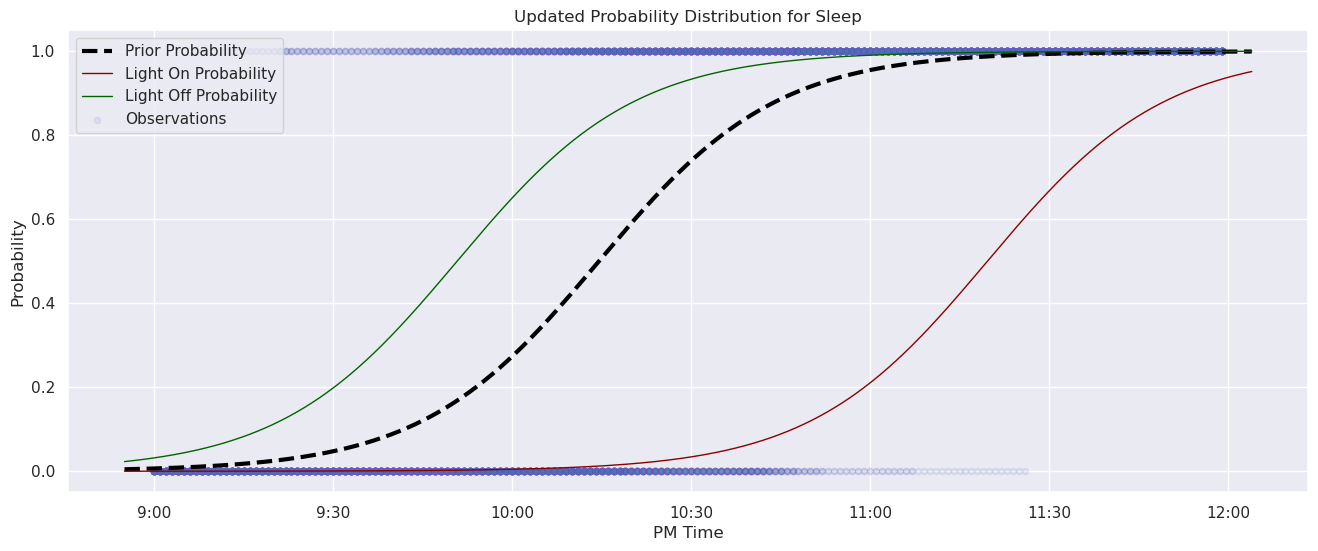

In [79]:
plt.plot(time_est, sleep_est, color = 'black', 
         lw=3, linestyle = '--', label="Prior Probability")
plt.plot(time_est, light_on_prob, color = 'darkred',
          lw = 1, label = 'Light On Probability')
plt.plot(time_est, light_off_prob, color = 'darkgreen',
           lw = 1, label = 'Light Off Probability')
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=20, alpha=0.1, label='Observations')
plt.title('Updated Probability Distribution for Sleep');
plt.legend(loc=2)
plt.ylabel('Probability')
plt.xlabel('PM Time')
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels)

plt.show()